In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig

In [2]:
first = 'BL'
filename_first= ('/home/mooreank/index_beta_plots/filtered_index_{}.csv').format(first)
first_index_df = pd.read_csv(filename_first)
first_index_df = first_index_df.drop_duplicates(['INDEX PAIR'])
#first_sig = (first_index_df[first_index_df['bh_fdr'] <= 0.01])
#first_sig_pairs = (first_sig['INDEX PAIR']).tolist()

second = 'V02'
filename_second = ('/home/mooreank/index_beta_plots/filtered_index_{}.csv').format(second)
second_index_df = pd.read_csv(filename_second)
second_index_df = second_index_df.drop_duplicates(['INDEX PAIR'])
#second_sig = (second_index_df[second_index_df['bh_fdr'] <= 0.01])
#second_sig_pairs = (second_sig['INDEX PAIR']).tolist()

third = 'V04'
filename_third= ('/home/mooreank/index_beta_plots/filtered_index_{}.csv').format(third)
third_index_df = pd.read_csv(filename_third)
third_index_df = third_index_df.drop_duplicates(['INDEX PAIR'])
#third_sig = (third_index_df[third_index_df['bh_fdr'] <= 0.01])
#third_sig_pairs = (third_sig['INDEX PAIR']).tolist()

fourth = 'V06'
filename_fourth = ('/home/mooreank/index_beta_plots/filtered_index_{}.csv').format(fourth)
fourth_index_df = pd.read_csv(filename_fourth)
fourth_index_df = fourth_index_df.drop_duplicates(['INDEX PAIR'])
#fourth_sig = (fourth_index_df[fourth_index_df['bh_fdr'] <= 0.01])
#fourth_sig_pairs = (fourth_sig['INDEX PAIR']).tolist()

fifth = 'V08'
filename_fifth = ('/home/mooreank/index_beta_plots/filtered_index_{}.csv').format(fifth)
fifth_index_df = pd.read_csv(filename_fifth)
fifth_index_df = fifth_index_df.drop_duplicates(['INDEX PAIR'])
#fourth_sig = (fourth_index_df[fourth_index_df['bh_fdr'] <= 0.01])
#fourth_sig_pairs = (fourth_sig['INDEX PAIR']).tolist()

In [34]:
print(first_index_df.shape)
print(second_index_df.shape)
print(third_index_df.shape)
print(fourth_index_df.shape)
print(fifth_index_df.shape)

(65945, 21)
(60643, 21)
(59951, 21)
(57421, 21)
(51372, 21)


In [4]:
first_index_df.head()

,GENEID,CHROM,POS,ID,REF,ALT,A1,A1_CT,A1_FREQ,TEST,...,BETA,SE,T_STAT,P,GENE_NAME,bh_fdr,storey_q,INDEX PAIR,ZSCORE,VISIT
0,ENSG00000232857.2,1,95033420,chr1:95033420:T:TAC,T,TAC,TAC,143,0.058415,ADD,...,-0.300031,0.085372,-3.51441,4.568420e-04,KATNBL1P2,2.742349e-02,2.440525e-02,ENSG00000232857.2_chr1:95033420:T:TAC,-3.514408,BL
1,ENSG00000162374.16,1,50965057,chr1:50965057:T:TATAGATAGATAG,T,TATAGATAGATAG,TATAGATAGATAG,104,0.042484,ADD,...,-0.375188,0.102039,-3.67691,2.463270e-04,ELAVL4,1.651645e-02,1.469864e-02,ENSG00000162374.16_chr1:50965057:T:TATAGATAGATAG,-3.676908,BL
2,ENSG00000184678.10,1,149638965,chr1:149638965:C:T,C,T,T,39,0.015931,ADD,...,-0.814170,0.169095,-4.81485,1.657280e-06,HIST2H2BE,1.979992e-04,1.762073e-04,ENSG00000184678.10_chr1:149638965:C:T,-4.814867,BL
3,ENSG00000184678.10,1,149901060,chr1:149901060:AGGG:A,AGGG,A,A,61,0.024918,ADD,...,-0.557437,0.134509,-4.14423,3.644510e-05,HIST2H2BE,3.220327e-03,2.865897e-03,ENSG00000184678.10_chr1:149901060:AGGG:A,-4.144236,BL
4,ENSG00000244682.7,1,161595591,chr1:161595591:A:G,A,G,G,413,0.168847,ADD,...,-0.862365,0.046017,-18.74020,4.524000e-69,FCGR2C,1.622150e-65,1.443616e-65,ENSG00000244682.7_chr1:161595591:A:G,-18.740180,BL


In [9]:
#pairing up visit dfs, chekcing if both fdrs are signficant,if A1s dont match take absolute value of betas
master_dfBLV02 = pd.merge(first_index_df,second_index_df, on='INDEX PAIR', suffixes=('_BL','_V02'))       
master_dfBLV02['BOTH_SIG'] = (master_dfBLV02['bh_fdr_BL'] <= 0.01) & (master_dfBLV02['bh_fdr_V02'] <= 0.01)
master_dfBLV02.loc[master_dfBLV02['A1_BL'] != master_dfBLV02['A1_V02'], 'BETA_BL'] = abs(master_dfBLV02['BETA_BL'])
master_dfBLV02.loc[master_dfBLV02['A1_BL'] != master_dfBLV02['A1_V02'], 'BETA_V02'] = abs(master_dfBLV02['BETA_V02'])

master_dfBLV04 = pd.merge(first_index_df,third_index_df, on='INDEX PAIR', suffixes=('_BL','_V04'))
master_dfBLV04['BOTH_SIG'] = (master_dfBLV04['bh_fdr_BL'] <= 0.01) & (master_dfBLV04['bh_fdr_V04'] <= 0.01)
master_dfBLV04.loc[master_dfBLV04['A1_BL'] != master_dfBLV04['A1_V04'], 'BETA_BL'] = abs(master_dfBLV04['BETA_BL'])
master_dfBLV04.loc[master_dfBLV04['A1_BL'] != master_dfBLV04['A1_V04'], 'BETA_V04'] = abs(master_dfBLV04['BETA_V04'])
 
master_dfBLV06 = pd.merge(first_index_df,fourth_index_df, on='INDEX PAIR', suffixes=('_BL','_V06'))
master_dfBLV06['BOTH_SIG'] = (master_dfBLV06['bh_fdr_BL'] <= 0.01) & (master_dfBLV06['bh_fdr_V06'] <= 0.01)
master_dfBLV06.loc[master_dfBLV06['A1_BL'] != master_dfBLV06['A1_V06'], 'BETA_BL'] = abs(master_dfBLV06['BETA_BL'])
master_dfBLV06.loc[master_dfBLV06['A1_BL'] != master_dfBLV06['A1_V06'], 'BETA_V06'] = abs(master_dfBLV06['BETA_V06'])
   
master_dfBLV08 = pd.merge(first_index_df,fifth_index_df, on='INDEX PAIR', suffixes=('_BL','_V08'))
master_dfBLV08['BOTH_SIG'] = (master_dfBLV08['bh_fdr_BL'] <= 0.01) & (master_dfBLV08['bh_fdr_V08'] <= 0.01)
master_dfBLV08.loc[master_dfBLV08['A1_BL'] != master_dfBLV08['A1_V08'], 'BETA_BL'] = abs(master_dfBLV08['BETA_BL'])
master_dfBLV08.loc[master_dfBLV08['A1_BL'] != master_dfBLV08['A1_V08'], 'BETA_V08'] = abs(master_dfBLV08['BETA_V08'])

master_dfV02V04 = pd.merge(second_index_df,third_index_df, on='INDEX PAIR', suffixes=('_V02','_V04'))
master_dfV02V04['BOTH_SIG'] = (master_dfV02V04['bh_fdr_V02'] <= 0.01) & (master_dfV02V04['bh_fdr_V04'] <= 0.01)
master_dfV02V04.loc[master_dfV02V04['A1_V02'] != master_dfV02V04['A1_V04'], 'BETA_V02'] = abs(master_dfV02V04['BETA_V02'])
master_dfV02V04.loc[master_dfV02V04['A1_V02'] != master_dfV02V04['A1_V04'], 'BETA_V04'] = abs(master_dfV02V04['BETA_V04'])
    
master_dfV02V06 = pd.merge(second_index_df,fourth_index_df, on='INDEX PAIR', suffixes=('_V02','_V06'))
master_dfV02V06['BOTH_SIG'] = (master_dfV02V06['bh_fdr_V02'] <= 0.01) & (master_dfV02V06['bh_fdr_V06'] <= 0.01)
master_dfV02V06.loc[master_dfV02V06['A1_V02'] != master_dfV02V06['A1_V06'], 'BETA_V02'] = abs(master_dfV02V06['BETA_V02'])
master_dfV02V06.loc[master_dfV02V06['A1_V02'] != master_dfV02V06['A1_V06'], 'BETA_V06'] = abs(master_dfV02V06['BETA_V06'])
   
master_dfV02V08 = pd.merge(second_index_df,fifth_index_df, on='INDEX PAIR', suffixes=('_V02','_V08'))
master_dfV02V08['BOTH_SIG'] = (master_dfV02V08['bh_fdr_V02'] <= 0.01) & (master_dfV02V08['bh_fdr_V08'] <= 0.01)
master_dfV02V08.loc[master_dfV02V08['A1_V02'] != master_dfV02V08['A1_V08'], 'BETA_V02'] = abs(master_dfV02V08['BETA_V02'])
master_dfV02V08.loc[master_dfV02V08['A1_V02'] != master_dfV02V08['A1_V08'], 'BETA_V08'] = abs(master_dfV02V08['BETA_V08'])

master_dfV04V06 = pd.merge(third_index_df,fourth_index_df, on='INDEX PAIR', suffixes=('_V04','_V06'))
master_dfV04V06['BOTH_SIG'] = (master_dfV04V06['bh_fdr_V04'] <= 0.01) & (master_dfV04V06['bh_fdr_V06'] <= 0.01)
master_dfV04V06.loc[master_dfV04V06['A1_V04'] != master_dfV04V06['A1_V06'], 'BETA_V04'] = abs(master_dfV04V06['BETA_V04'])
master_dfV04V06.loc[master_dfV04V06['A1_V04'] != master_dfV04V06['A1_V06'], 'BETA_V06'] = abs(master_dfV04V06['BETA_V04'])
    
master_dfV04V08 = pd.merge(third_index_df,fifth_index_df, on='INDEX PAIR', suffixes=('_V04','_V08'))
master_dfV04V08['BOTH_SIG'] = (master_dfV04V08['bh_fdr_V04'] <= 0.01) & (master_dfV04V08['bh_fdr_V08'] <= 0.01)
master_dfV04V08.loc[master_dfV04V08['A1_V04'] != master_dfV04V08['A1_V08'], 'BETA_V04'] = abs(master_dfV04V08['BETA_V04'])
master_dfV04V08.loc[master_dfV04V08['A1_V04'] != master_dfV04V08['A1_V08'], 'BETA_V08'] = abs(master_dfV04V08['BETA_V08'])

master_dfV06V08 = pd.merge(fourth_index_df,fifth_index_df, on='INDEX PAIR', suffixes=('_V06','_V08'))
master_dfV06V08['BOTH_SIG'] = (master_dfV06V08['bh_fdr_V06'] <= 0.01) & (master_dfV06V08['bh_fdr_V08'] <= 0.01)
master_dfV06V08.loc[master_dfV06V08['A1_V06'] != master_dfV06V08['A1_V08'], 'BETA_V06'] = abs(master_dfV06V08['BETA_V06'])
master_dfV06V08.loc[master_dfV06V08['A1_V06'] != master_dfV06V08['A1_V08'], 'BETA_V08'] = abs(master_dfV06V08['BETA_V08'])

#master_df.columns.values
#master_df['SIG BOTH'] = master_df[(master_df['bh_fdr_x'] <= 0.01) & [(master_df['bh_fdr_y'] <= 0.01)]]

In [75]:
print(master_dfBLV02.shape)
print(master_dfBLV04.shape)
print(master_dfBLV06.shape)
print(master_dfBLV08.shape)
#print(fifth_index_df.shape)

(38370, 42)
(37663, 42)
(35860, 42)
(31360, 42)


In [30]:
#checking major/minor alleles
pd.set_option('display.max_columns', None)
master_dfBLV02.head()


,GENEID_BL,CHROM_BL,POS_BL,ID_BL,REF_BL,ALT_BL,A1_BL,A1_CT_BL,A1_FREQ_BL,TEST_BL,OBS_CT_BL,BETA_BL,SE_BL,T_STAT_BL,P_BL,GENE_NAME_BL,bh_fdr_BL,storey_q_BL,INDEX PAIR,ZSCORE_BL,VISIT_BL,GENEID_V02,CHROM_V02,POS_V02,ID_V02,REF_V02,ALT_V02,A1_V02,A1_CT_V02,A1_FREQ_V02,TEST_V02,OBS_CT_V02,BETA_V02,SE_V02,T_STAT_V02,P_V02,GENE_NAME_V02,bh_fdr_V02,storey_q_V02,ZSCORE_V02,VISIT_V02,BOTH_SIG
0,ENSG00000244682.7,1,161595591,chr1:161595591:A:G,A,G,G,413,0.168847,ADD,1223,-0.862365,0.046017,-18.7402,4.524000e-69,FCGR2C,1.622150e-65,1.443616e-65,ENSG00000244682.7_chr1:161595591:A:G,-18.740180,BL,ENSG00000244682.7,1,161595591,chr1:161595591:A:G,A,G,G,237,0.156954,ADD,755,-0.808715,0.059915,-13.49770,2.433640e-37,FCGR2C,5.786005e-34,5.357615e-34,-13.497683,V02,True
1,ENSG00000117697.14,1,212727895,chr1:212727895:T:C,T,C,C,281,0.114788,ADD,1224,0.753735,0.059055,12.7632,4.114910e-35,NSL1,4.643398e-32,4.132344e-32,ENSG00000117697.14_chr1:212727895:T:C,12.763228,BL,ENSG00000117697.14,1,212727895,chr1:212727895:T:C,T,C,C,188,0.124503,ADD,755,0.621690,0.067028,9.27506,1.839850e-19,NSL1,1.371693e-16,1.270134e-16,9.275065,V02,True
2,ENSG00000117697.14,1,212744996,chr1:212744996:C:T,C,T,T,279,0.113971,ADD,1224,0.756914,0.059685,12.6818,1.032280e-34,NSL1,1.147018e-31,1.020777e-31,ENSG00000117697.14_chr1:212744996:C:T,12.681834,BL,ENSG00000117697.14,1,212744996,chr1:212744996:C:T,C,T,T,186,0.123179,ADD,755,0.634663,0.067972,9.33709,1.090020e-19,NSL1,8.287882e-17,7.674255e-17,9.337083,V02,True
3,ENSG00000117697.14,1,212794150,chr1:212794150:A:G,A,G,G,356,0.145425,ADD,1224,0.647021,0.054143,11.9501,3.294400e-31,NSL1,3.097817e-28,2.756871e-28,ENSG00000117697.14_chr1:212794150:A:G,11.950114,BL,ENSG00000117697.14,1,212794150,chr1:212794150:A:G,A,G,G,233,0.154305,ADD,755,0.543690,0.061594,8.82696,7.450610e-18,NSL1,4.845912e-15,4.487126e-15,8.826967,V02,True
4,ENSG00000117697.14,1,212804855,chr1:212804855:T:G,T,G,G,300,0.122549,ADD,1224,0.706667,0.057814,12.2231,1.694500e-32,NSL1,1.695881e-29,1.509232e-29,ENSG00000117697.14_chr1:212804855:T:G,12.223154,BL,ENSG00000117697.14,1,212804855,chr1:212804855:T:G,T,G,G,194,0.128477,ADD,755,0.585839,0.066414,8.82107,7.814260e-18,NSL1,5.072164e-15,4.696626e-15,8.821070,V02,True


In [31]:
master_dfBLV04.head()

,GENEID_BL,CHROM_BL,POS_BL,ID_BL,REF_BL,ALT_BL,A1_BL,A1_CT_BL,A1_FREQ_BL,TEST_BL,OBS_CT_BL,BETA_BL,SE_BL,T_STAT_BL,P_BL,GENE_NAME_BL,bh_fdr_BL,storey_q_BL,INDEX PAIR,ZSCORE_BL,VISIT_BL,GENEID_V04,CHROM_V04,POS_V04,ID_V04,REF_V04,ALT_V04,A1_V04,A1_CT_V04,A1_FREQ_V04,TEST_V04,OBS_CT_V04,BETA_V04,SE_V04,T_STAT_V04,P_V04,GENE_NAME_V04,bh_fdr_V04,storey_q_V04,ZSCORE_V04,VISIT_V04,BOTH_SIG
0,ENSG00000184678.10,1,149901060,chr1:149901060:AGGG:A,AGGG,A,A,61,0.024918,ADD,1224,-0.557437,0.134509,-4.14423,3.644510e-05,HIST2H2BE,3.220327e-03,2.865897e-03,ENSG00000184678.10_chr1:149901060:AGGG:A,-4.144236,BL,ENSG00000184678.10,1,149901060,chr1:149901060:AGGG:A,AGGG,A,A,43,0.028141,ADD,764,-0.565711,0.163019,-3.47022,5.492790e-04,HIST2H2BE,4.693761e-02,4.383717e-02,-3.470215,V04,False
1,ENSG00000244682.7,1,161595591,chr1:161595591:A:G,A,G,G,413,0.168847,ADD,1223,-0.862365,0.046017,-18.74020,4.524000e-69,FCGR2C,1.622150e-65,1.443616e-65,ENSG00000244682.7_chr1:161595591:A:G,-18.740180,BL,ENSG00000244682.7,1,161595591,chr1:161595591:A:G,A,G,G,234,0.153342,ADD,763,-0.764264,0.059284,-12.89150,1.551660e-34,FCGR2C,3.566933e-31,3.331321e-31,-12.891508,V04,True
2,ENSG00000117697.14,1,212727895,chr1:212727895:T:C,T,C,C,281,0.114788,ADD,1224,0.753735,0.059055,12.76320,4.114910e-35,NSL1,4.643398e-32,4.132344e-32,ENSG00000117697.14_chr1:212727895:T:C,12.763228,BL,ENSG00000117697.14,1,212727895,chr1:212727895:T:C,T,C,C,181,0.118455,ADD,764,0.697406,0.075096,9.28687,1.623190e-19,NSL1,1.390821e-16,1.298951e-16,9.286872,V04,True
3,ENSG00000117697.14,1,212744996,chr1:212744996:C:T,C,T,T,279,0.113971,ADD,1224,0.756914,0.059685,12.68180,1.032280e-34,NSL1,1.147018e-31,1.020777e-31,ENSG00000117697.14_chr1:212744996:C:T,12.681834,BL,ENSG00000117697.14,1,212744996,chr1:212744996:C:T,C,T,T,179,0.117147,ADD,764,0.719277,0.076115,9.44991,4.063600e-20,NSL1,3.660459e-17,3.418670e-17,9.449909,V04,True
4,ENSG00000117697.14,1,212794150,chr1:212794150:A:G,A,G,G,356,0.145425,ADD,1224,0.647021,0.054143,11.95010,3.294400e-31,NSL1,3.097817e-28,2.756871e-28,ENSG00000117697.14_chr1:212794150:A:G,11.950114,BL,ENSG00000117697.14,1,212794150,chr1:212794150:A:G,A,G,G,228,0.149215,ADD,764,0.661541,0.067825,9.75362,2.932230e-21,NSL1,2.883113e-18,2.692671e-18,9.753617,V04,True


In [39]:
#subsetting just for ids and betas
BLV02 = master_dfBLV02[['ID_BL','BETA_BL','ID_V02','BETA_V02']]
BLV04 = master_dfBLV04[['ID_BL','BETA_BL','ID_V04','BETA_V04']]
# BLV06 = master_dfBLV06[['ID_BL','BETA_BL','ID_V06','BETA_V06']]
# BLV08 = master_dfBLV08[['ID_BL','BETA_BL','ID_V08','BETA_V08']]

# V02V04 = master_dfV02V04[['ID_V02','BETA_V02','ID_V04','BETA_V04']]
# V02V06 = master_dfV02V06[['ID_V02','BETA_V02','ID_V06','BETA_V06']]
# V02V08 = master_dfV02V08[['ID_V02','BETA_V02','ID_V08','BETA_V08']]

# V04V06 = master_dfV04V06[['ID_V04','BETA_V04','ID_V06','BETA_V06']]
# V04V08 = master_dfV04V08[['ID_V04','BETA_V04','ID_V08','BETA_V08']]

# V06V08 = master_dfV06V08[['ID_V06','BETA_V06','ID_V08','BETA_V08']]


In [ ]:
#merging betas for all visits
BLV02V04 = BLV02.merge(BLV04)
BLV02V04V06 = BLV02V04.merge(BLV06)
BLV02V04V06V08 = BLV02V04V06.merge(BLV08)

In [70]:
BLV02V04V06V08.head()

,ID_BL,BETA_BL,ID_V02,BETA_V02,ID_V04,BETA_V04,ID_V06,BETA_V06,ID_V08,BETA_V08
0,chr1:161595591:A:G,-0.862365,chr1:161595591:A:G,-0.808715,chr1:161595591:A:G,-0.764264,chr1:161595591:A:G,-0.789912,chr1:161595591:A:G,-0.741195
1,chr1:212727895:T:C,0.753735,chr1:212727895:T:C,0.621690,chr1:212727895:T:C,0.697406,chr1:212727895:T:C,0.728681,chr1:212727895:T:C,0.866497
2,chr1:212744996:C:T,0.756914,chr1:212744996:C:T,0.634663,chr1:212744996:C:T,0.719277,chr1:212744996:C:T,0.733304,chr1:212744996:C:T,0.880091
3,chr1:212794150:A:G,0.647021,chr1:212794150:A:G,0.543690,chr1:212794150:A:G,0.661541,chr1:212794150:A:G,0.680158,chr1:212794150:A:G,0.762300
4,chr1:212804855:T:G,0.706667,chr1:212804855:T:G,0.585839,chr1:212804855:T:G,0.666591,chr1:212804855:T:G,0.736453,chr1:212804855:T:G,0.838358


In [69]:
BLV02V04V06V08.shape

(27055, 10)

In [65]:
#getting correlation of betas for each visit
heatmap = BLV02V04V06V08.corr(method='pearson')

In [67]:
#fixing axis titles
heatmap.columns = ['BL','V02','V04','V06','V08']
heatmap.index = ['BL','V02','V04','V06','V08']
heatmap

,BL,V02,V04,V06,V08
BL,1.000000,0.992277,0.991720,0.990729,0.988087
V02,0.992277,1.000000,0.991341,0.990221,0.987390
V04,0.991720,0.991341,1.000000,0.990888,0.988530
V06,0.990729,0.990221,0.990888,1.000000,0.988664
V08,0.988087,0.987390,0.988530,0.988664,1.000000


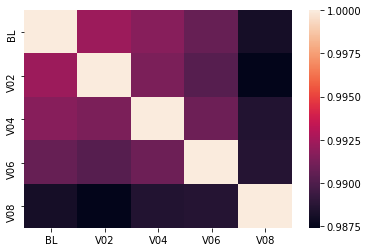

In [76]:
##plotting correlation
f = sns.heatmap(test)

In [80]:
f.figure.savefig("visit_betas_heatmap.png")

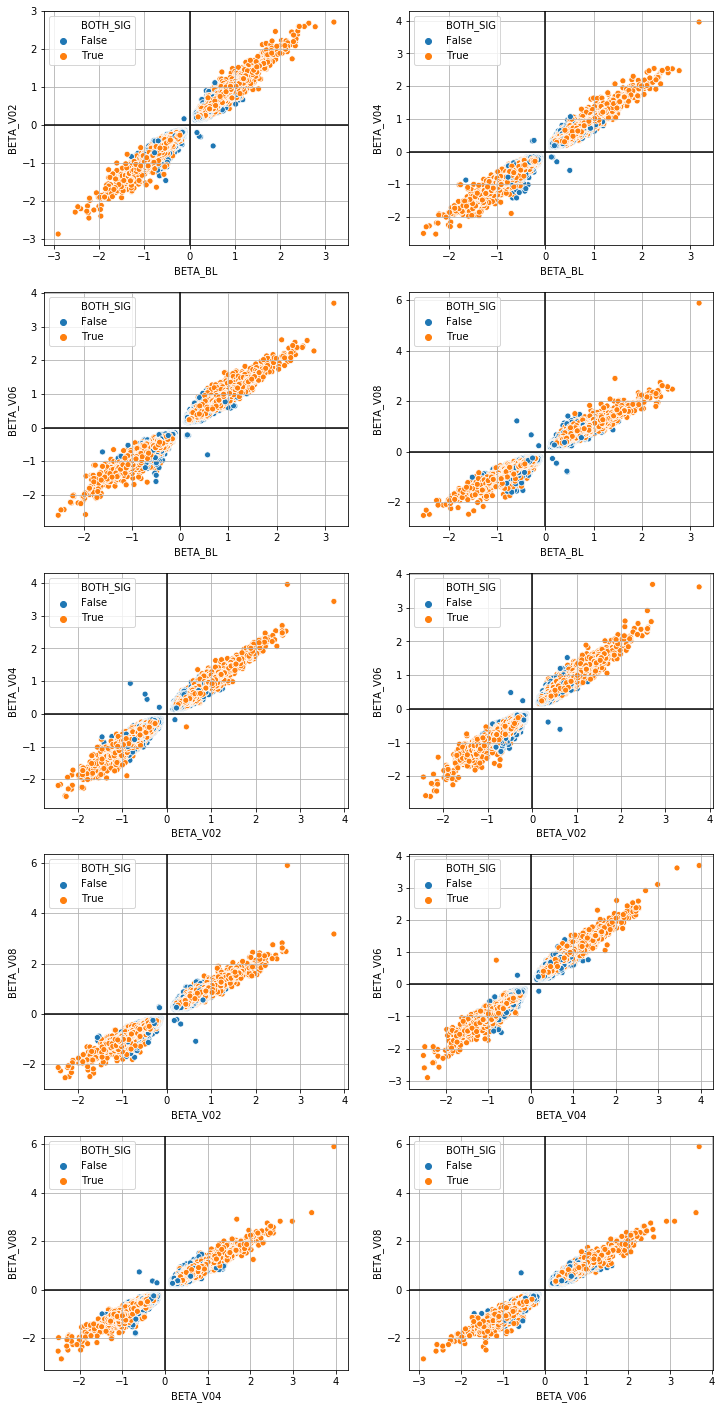

In [5]:
##plotting scatterplots comparing each pair of visits
f = plt.figure(figsize=(12,25))
ax1 = plt.subplot(5,2,1)
sns.scatterplot(x='BETA_BL',y='BETA_V02',hue='BOTH_SIG',data=master_dfBLV02)
ax1.grid(True, which='both')
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

ax2 = plt.subplot(5,2,2)
sns.scatterplot(x='BETA_BL',y='BETA_V04',hue='BOTH_SIG',data=master_dfBLV04)
ax2.grid(True, which='both')
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')

ax3 = plt.subplot(5,2,3)
sns.scatterplot(x='BETA_BL',y='BETA_V06',hue='BOTH_SIG',data=master_dfBLV06)
ax3.grid(True, which='both')
ax3.axhline(y=0, color='k')
ax3.axvline(x=0, color='k')

ax4 = plt.subplot(5,2,4)
sns.scatterplot(x='BETA_BL',y='BETA_V08',hue='BOTH_SIG',data=master_dfBLV08)
ax4.grid(True, which='both')
ax4.axhline(y=0, color='k')
ax4.axvline(x=0, color='k')

ax5 = plt.subplot(5,2,5)
sns.scatterplot(x='BETA_V02',y='BETA_V04',hue='BOTH_SIG',data=master_dfV02V04)
ax5.grid(True, which='both')
ax5.axhline(y=0, color='k')
ax5.axvline(x=0, color='k')

ax6 = plt.subplot(5,2,6)
sns.scatterplot(x='BETA_V02',y='BETA_V06',hue='BOTH_SIG',data=master_dfV02V06)
ax6.grid(True, which='both')
ax6.axhline(y=0, color='k')
ax6.axvline(x=0, color='k')

ax7 = plt.subplot(5,2,7)
sns.scatterplot(x='BETA_V02',y='BETA_V08',hue='BOTH_SIG',data=master_dfV02V08)
ax7.grid(True, which='both')
ax7.axhline(y=0, color='k')
ax7.axvline(x=0, color='k')

ax8 = plt.subplot(5,2,8)
sns.scatterplot(x='BETA_V04',y='BETA_V06',hue='BOTH_SIG',data=master_dfV04V06)
ax8.grid(True, which='both')
ax8.axhline(y=0, color='k')
ax8.axvline(x=0, color='k')

ax9 = plt.subplot(5,2,9)
sns.scatterplot(x='BETA_V04',y='BETA_V08',hue='BOTH_SIG',data=master_dfV04V08)
ax9.grid(True, which='both')
ax9.axhline(y=0, color='k')
ax9.axvline(x=0, color='k')

ax10 = plt.subplot(5,2,10)
sns.scatterplot(x='BETA_V06',y='BETA_V08',hue='BOTH_SIG',data=master_dfV06V08)
ax10.grid(True, which='both')
ax10.axhline(y=0, color='k')
ax10.axvline(x=0, color='k')

plt.show()
#f.savefig("visit_plots.png", bbox_inches='tight')

In [6]:
f.savefig("visit_plots_new.png", bbox_inches='tight')

In [25]:
##looking at points with insignificant fdrs
insigBLV02 = master_dfBLV02.loc[master_dfBLV02['BOTH_SIG'] == False]
#insigBLV02.head()
insigBLV02.to_csv('/home/mooreank/index_beta_plots/insig_BLV02.txt',header=True, index=False,sep ='\t',mode='a')

insigBLV04 = master_dfBLV04.loc[master_dfBLV04['BOTH_SIG'] == False]
#insigBLV04.head()
insigBLV04.to_csv('/home/mooreank/index_beta_plots/insig_BLV04.txt',header=True, index=False,sep ='\t',mode='a')

insigBLV06 = master_dfBLV06.loc[master_dfBLV06['BOTH_SIG'] == False]
#insigBLV06.head()
insigBLV06.to_csv('/home/mooreank/index_beta_plots/insig_BLV06.txt',header=True, index=False,sep ='\t',mode='a')

insigBLV08 = master_dfBLV08.loc[master_dfBLV08['BOTH_SIG'] == False]
#insigBLV08.head()
insigBLV08.to_csv('/home/mooreank/index_beta_plots/insig_BLV08.txt',header=True, index=False,sep ='\t',mode='a')


In [12]:
#BL v V02
#looking at significant points in top left/bottom right of plot
pd.set_option('display.max_columns', None)

#sig_master_dfBLV02 = master_dfBLV02[master_dfBLV02['BOTH_SIG'] == True]
low_df =  master_dfBLV02.loc[( master_dfBLV02['BETA_BL'] < -0.15) & (master_dfBLV02['BETA_V02'] > 0.3)]
high_df =  master_dfBLV02.loc[( master_dfBLV02['BETA_BL'] > 0) & (master_dfBLV02['BETA_V02'] < -1)]
signif_df = low_df.append(high_df)


text = signif_df[['INDEX PAIR','BETA_BL','BETA_V02','BOTH_SIG']]
#text.to_csv('/home/mooreank/check_master_dfBLV02.txt',header=True, index=False,sep ='\t',mode='a')
text

,INDEX PAIR,BETA_BL,BETA_V02,BOTH_SIG
13681,ENSG00000253887.1_chr8:9210057:C:CT,-0.372740,0.463644,False
28121,ENSG00000228234.1_chr20:38178174:G:A,-0.196679,0.559554,False
28141,ENSG00000185982.6_chr20:245464:TATATATATAGAGAG...,-0.151715,0.908760,False
28569,ENSG00000275453.2_chr20:38339501:G:A,-0.181440,0.585369,False
28524,ENSG00000149635.2_chr20:47416127:GAAAAGAAAAGGA...,0.077725,-1.063370,False
28829,ENSG00000230772.1_chr20:26205783:A:*,0.009656,-1.025840,False
28882,ENSG00000263755.2_chr20:6947139:C:T,0.267815,-1.148930,False
28906,ENSG00000088836.13_chr20:2982091:C:CT,0.085291,-1.078210,False
29215,ENSG00000201501.1_chr20:50860176:C:G,0.068014,-1.051510,False


In [14]:
# BL v V04

#sig_master_dfBLV04 = master_dfBLV04[master_dfBLV04['BOTH_SIG'] == True]
#low_df = sig_master_dfBLV04.loc[(sig_master_dfBLV04['BETA_BL'] < -1.5) & (sig_master_dfBLV04['BETA_V04'] > 1.5)]
#high_df = sig_master_dfBLV04.loc[(sig_master_dfBLV04['BETA_BL'] > 2) & (sig_master_dfBLV04['BETA_V04'] < -2)]

#sig_master_dfBLV02 = master_dfBLV02[master_dfBLV02['BOTH_SIG'] == True]
low_df =  master_dfBLV04.loc[(master_dfBLV04['BETA_BL'] < -0.15) & (master_dfBLV04['BETA_V04'] > 0.5)]
high_df =  master_dfBLV04.loc[(master_dfBLV04['BETA_BL'] > 0.15) & (master_dfBLV04['BETA_V04'] < -0.75)]
signif_df = low_df.append(high_df)

signif_df = low_df.append(high_df)
text = signif_df[['INDEX PAIR', 'BETA_BL','BETA_V04','BOTH_SIG']]
#text.to_csv('/home/mooreank/check_master_dfBLV04.txt',header=True, index=False,sep ='\t',mode='a')
text

,INDEX PAIR,BETA_BL,BETA_V04,BOTH_SIG
27613,ENSG00000230155.6_chr20:36396567:CACACACCACATA...,-0.177623,0.824249,False
27948,ENSG00000271426.1_chr20:13235465:T:A,-0.161486,0.779926,False
28021,ENSG00000237000.1_chr20:55933623:T:C,-0.177031,0.555696,False
28049,ENSG00000269931.1_chr20:12472700:T:G,-0.198463,0.779168,False
27213,ENSG00000149451.17_chr20:4021245:C:T,0.291186,-0.789350,False
27235,ENSG00000101278.6_chr20:660098:C:A,0.300255,-0.852318,False
27407,ENSG00000263989.2_chr20:41918181:TCTTTCCTTCTTT...,0.182221,-0.752989,False
27484,ENSG00000236456.1_chr20:33887386:CTCTCTCTCTCTA...,0.158421,-0.957644,False
28001,ENSG00000088836.13_chr20:2603777:C:T,0.169690,-0.972526,False
28162,ENSG00000197670.6_chr20:54232167:G:C,0.225622,-0.818221,False


In [17]:
# BL v V06

#sig_master_dfBLV06 = master_dfBLV06[master_dfBLV06['BOTH_SIG'] == True]
#low_df = sig_master_dfBLV06.loc[(sig_master_dfBLV06['BETA_BL'] < -1.5) & (sig_master_dfBLV06['BETA_V06'] > 1.5)]
#high_df = sig_master_dfBLV06.loc[(sig_master_dfBLV06['BETA_BL'] > 2) & (sig_master_dfBLV06['BETA_V06'] < -2)]

#sig_master_dfBLV02 = master_dfBLV02[master_dfBLV02['BOTH_SIG'] == True]
low_df =  master_dfBLV06.loc[(master_dfBLV06['BETA_BL'] < -0.2) & (master_dfBLV06['BETA_V06'] > 0.5)]
high_df =  master_dfBLV06.loc[(master_dfBLV06['BETA_BL'] > 0.2) & (master_dfBLV06['BETA_V06'] < -0.75)]
signif_df = low_df.append(high_df)


text = signif_df[['INDEX PAIR', 'BETA_BL','BETA_V06','BOTH_SIG']]
text.to_csv('/home/mooreank/check_master_dfBLV06.txt',header=True, index=False,sep ='\t',mode='a')
text

,INDEX PAIR,BETA_BL,BETA_V06,BOTH_SIG
21825,ENSG00000255986.6_chr16:57054953:C:T,-0.802694,0.872469,False
26158,ENSG00000234693.1_chr20:51346371:T:C,-0.204454,0.739443,False
26521,ENSG00000271397.1_chr20:11348487:A:T,-0.243149,0.877851,False
26564,ENSG00000180083.10_chr20:45423055:A:AT,-0.300836,0.807084,False
26716,ENSG00000282478.1_chr20:10640623:G:A,-0.207328,0.968344,False
26151,ENSG00000167104.11_chr20:33941678:A:AT,0.297034,-0.786855,False
26152,ENSG00000101280.7_chr20:851982:G:A,0.230807,-0.768520,False
26182,ENSG00000225956.1_chr20:13429615:A:AGT,0.237911,-0.865859,False
26212,ENSG00000124143.10_chr20:39100595:A:AAC,0.267845,-0.869055,False
26254,ENSG00000235166.7_chr20:55848962:T:G,0.213781,-0.938108,False


In [19]:
# BL v V08

#sig_master_dfBLV08 = master_dfBLV08[master_dfBLV08['BOTH_SIG'] == True]
#low_df = sig_master_dfBLV08.loc[(sig_master_dfBLV08['BETA_BL'] < -1.5) & (sig_master_dfBLV08['BETA_V08'] > 1.5)]
#high_df = sig_master_dfBLV08.loc[(sig_master_dfBLV08['BETA_BL'] > 2) & (sig_master_dfBLV08['BETA_V08'] < -2)]
#signif_df = low_df.append(high_df)

low_df =  master_dfBLV08.loc[(master_dfBLV08['BETA_BL'] < -0.25) & (master_dfBLV08['BETA_V08'] > 1.25)]
high_df =  master_dfBLV08.loc[(master_dfBLV08['BETA_BL'] > 0.1) & (master_dfBLV08['BETA_V08'] < -1.1)]
signif_df = low_df.append(high_df)


text = signif_df[['INDEX PAIR', 'BETA_BL','BETA_V08','BOTH_SIG']]
text.to_csv('/home/mooreank/check_master_dfBLV08.txt',header=True, index=False,sep ='\t',mode='a')
text

,INDEX PAIR,BETA_BL,BETA_V08,BOTH_SIG
22531,ENSG00000226308.1_chr20:58108575:G:C,-0.369241,1.26617,False
22649,ENSG00000124097.7_chr20:58108575:G:C,-0.250033,1.37364,False
23121,ENSG00000203266.2_chr20:58108575:G:C,-0.282288,1.31237,False
23161,ENSG00000124237.5_chr20:58132907:C:A,-0.275213,1.55903,False
22567,ENSG00000226995.7_chr20:4483301:C:A,0.108346,-1.19413,False
22675,ENSG00000261431.1_chr20:38114658:A:G,0.223796,-1.27111,False
22782,ENSG00000283757.1_chr20:47260341:C:T,0.267823,-1.35386,False
22885,ENSG00000101204.16_chr20:63443430:C:T,0.218150,-1.19556,False
22992,ENSG00000242748.1_chr20:40775345:T:C,0.191152,-1.18647,False


In [31]:
# V02 v V04

#sig_master_dfV02V04 = master_dfV02V04[master_dfV02V04['BOTH_SIG'] == True]
#low_df = sig_master_dfV02V04.loc[(sig_master_dfV02V04['BETA_V02'] < -1.5) & (sig_master_dfV02V04['BETA_V04'] > 1.5)]
#high_df = sig_master_dfV02V04.loc[(sig_master_dfV02V04['BETA_V02'] > 0.85) & (sig_master_dfV02V04['BETA_V04'] < -0.85)]
#signif_df = low_df.append(high_df)


low_df =  master_dfV02V04.loc[(master_dfV02V04['BETA_V02'] < -0.5) & (master_dfV02V04['BETA_V04'] > 4)]
high_df =  master_dfV02V04.loc[(master_dfV02V04['BETA_V02'] > 0.5) & (master_dfV02V04['BETA_V04'] < -0.75)]
signif_df = low_df.append(high_df)


text = signif_df[['INDEX PAIR', 'BETA_V02','BETA_V04','BOTH_SIG']]
#text.to_csv('/home/mooreank/sig_master_dfV02V04.txt',header=True, index=False,sep ='\t',mode='a')
text

,INDEX PAIR,BETA_V02,BETA_V04,BOTH_SIG
7868,ENSG00000251261.4_rs147318878,0.766363,-0.986914,True
11091,ENSG00000232445.1_rs58298425,0.947819,-0.964768,True
13493,ENSG00000231678.2_rs200793988,0.610656,-0.757449,True


In [17]:
# V02 v V06

sig_master_dfV02V06 = master_dfV02V06[master_dfV02V06['BOTH_SIG'] == True]
low_df = sig_master_dfV02V06.loc[(sig_master_dfV02V06['BETA_V02'] < -1.25) & (sig_master_dfV02V06['BETA_V06'] > 1.25)]
high_df = sig_master_dfV02V06.loc[(sig_master_dfV02V06['BETA_V02'] > 0.85) & (sig_master_dfV02V06['BETA_V06'] < -0.85)]
signif_df = low_df.append(high_df)
text = signif_df[['INDEX PAIR', 'BETA_V02','BETA_V06','BOTH_SIG']]
text.to_csv('/home/mooreank/sig_master_dfV02V06.txt',header=True, index=False,sep ='\t',mode='a')

In [18]:
# V02 v V08

sig_master_dfV02V08 = master_dfV02V08[master_dfV02V08['BOTH_SIG'] == True]
low_df = sig_master_dfV02V08.loc[(sig_master_dfV02V08['BETA_V02'] < -1.25) & (sig_master_dfV02V08['BETA_V08'] > 1.25)]
high_df = sig_master_dfV02V08.loc[(sig_master_dfV02V08['BETA_V02'] > 1) & (sig_master_dfV02V08['BETA_V08'] < -1)]
signif_df = low_df.append(high_df)
text = signif_df[['INDEX PAIR', 'BETA_V02','BETA_V08','BOTH_SIG']]
text.to_csv('/home/mooreank/sig_master_dfV02V08.txt',header=True, index=False,sep ='\t',mode='a')

In [19]:
# V04 v V06

sig_master_dfV04V06 = master_dfV04V06[master_dfV04V06['BOTH_SIG'] == True]
low_df = sig_master_dfV04V06.loc[(sig_master_dfV04V06['BETA_V04'] < -1) & (sig_master_dfV04V06['BETA_V06'] > 1)]
high_df = sig_master_dfV04V06.loc[(sig_master_dfV04V06['BETA_V04'] > 1) & (sig_master_dfV04V06['BETA_V06'] < -1)]
signif_df = low_df.append(high_df)
text = signif_df[['INDEX PAIR', 'BETA_V04','BETA_V06','BOTH_SIG']]
text.to_csv('/home/mooreank/sig_master_dfV04V06.txt',header=True, index=False,sep ='\t',mode='a')

In [20]:
# V04 v V08

sig_master_dfV04V08 = master_dfV04V08[master_dfV04V08['BOTH_SIG'] == True]
low_df = sig_master_dfV04V08.loc[(sig_master_dfV04V08['BETA_V04'] < -1) & (sig_master_dfV04V08['BETA_V08'] > 1)]
high_df = sig_master_dfV04V08.loc[(sig_master_dfV04V08['BETA_V04'] > 1) & (sig_master_dfV04V08['BETA_V08'] < -1)]
signif_df = low_df.append(high_df)
text = signif_df[['INDEX PAIR', 'BETA_V04','BETA_V08','BOTH_SIG']]
text.to_csv('/home/mooreank/sig_master_dfV04V08.txt',header=True, index=False,sep ='\t',mode='a')

In [21]:
# V06 v V08

sig_master_dfV06V08 = master_dfV06V08[master_dfV04V08['BOTH_SIG'] == True]
low_df = sig_master_dfV06V08.loc[(sig_master_dfV06V08['BETA_V06'] < -1) & (sig_master_dfV06V08['BETA_V08'] > 1)]
high_df = sig_master_dfV06V08.loc[(sig_master_dfV06V08['BETA_V06'] > 1) & (sig_master_dfV06V08['BETA_V08'] < -1)]
signif_df = low_df.append(high_df)
text = signif_df[['INDEX PAIR', 'BETA_V06','BETA_V08','BOTH_SIG']]
text.to_csv('/home/mooreank/sig_master_dfV06V08.txt',header=True, index=False,sep ='\t',mode='a')

/home/mooreank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
